# Predict Type of Iris Plant by Using K-NN #
## There are 3 different classes -> Multi-class classification problem ##


## Import necessary libraries ##

In [47]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
my_path = '/content/drive/MyDrive/Colab Notebooks/CS512/iris.csv'

### Load iris data and extract samples and labels from it
- First load the data
- Create a variable X for assign samples 
- Create a variable y for assign labels

In [50]:
df = pd.read_csv(my_path)

## Examine Data: Number of Classes, Number of Samples and Class Distributions##


In [51]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### <font color=green>Determine Number of samples</font> ###

In [52]:
df.shape

(150, 6)

### <font color=green>Determine Number of Classes and Class Distributions</font> ###

In [53]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [54]:
df[df.Species == 'Iris-setosa'].shape

(50, 6)

## <font color=green>Creating Feature Vectors</font> ##

 - <font color=red>*We will use all 4 features*</font>
 - <font color=red>* **Cheking Procedure:** *</font>
 
     - <font color=red>*The first number of the new shape (Instance Number) should be equal to old one*</font>
     - <font color=red>*The second number of the new shape (Feature Number) should be equal to 4*</font>

In [55]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
X = df.drop(['Id','Species'], axis = 1).values

In [57]:
y = df['Species'].values

## <font color=green>Encoding</font> ##

 - <font color=red>*Feature vectors should be numerical because algorithm will calculate distance between samples*</font>
 - <font color=red>*But you can use strings as labels for this algorithm*</font>


In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

y_encoded = le.fit_transform(y)

In [59]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [60]:
y_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## <font color=green>Data Split</font> ##
*Lets first shuffle data*

In [61]:
from sklearn.utils import shuffle
X, y = shuffle(X, y, random_state=5)

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=9)

## <font color=green>Create Knn Classifier</font> ##


In [63]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 3)

In [64]:
#now lets train this classifier
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [65]:
y_pred = classifier.predict(X_test) #this predict function takes our test samples and predict their labels
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

In [66]:
#Also in some cases you may want to get class probabilities

y_pred_prob = classifier.predict_proba(X_test)
y_pred_prob

array([[0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.66666667, 0.33333333],
       [0.        , 1.        , 0.        ],
       [0.

In [67]:
test_acc = accuracy_score(y_test, y_pred)
test_acc

0.9666666666666667

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


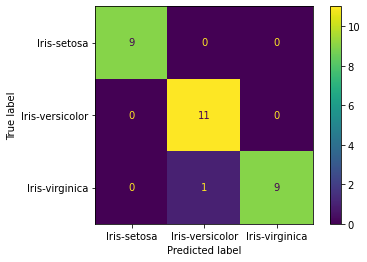

In [68]:
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

## <font color=green>Find Best K (Tuning)</font> ##

- ### <font color=green>By using Train-Test Split and Loop</font> ###
- ### <font color=green>By Cross Validation</font> ###
- ### <font color=green>By Grid Search</font> ###

* ### <font color=red>Try to observe accuracy error between using Train-Test split and CV</font> ###


In [69]:
k_values = list(range(1,32))
k_values

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

### <font color=green>Use Cross-Validation</font> ###
*If you need to create validation or test data, use cross-validation for better estimation*

In [70]:
from sklearn.model_selection import cross_val_score

allScores = []
for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn,X_train,y_train, cv = 5, scoring = 'accuracy')
  allScores.append(scores.mean())

In [71]:
scores #for each 5 fold it gave me 5 scores

array([0.95833333, 0.95833333, 1.        , 0.95833333, 0.91666667])

In [72]:
best_index = allScores.index(max(allScores)) #I want to take index of some value and that value is max of allscores

In [73]:
best_k = k_values[best_index]
best_k

8

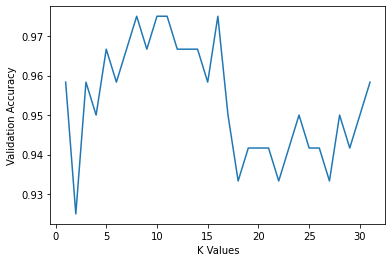

In [74]:
plt.plot(k_values,allScores)
plt.xlabel('K Values')
plt.ylabel('Validation Accuracy')
plt.show()

In [75]:
classifier = KNeighborsClassifier(n_neighbors = best_k)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
test_acc #100 percent accuracy. But we do not report. By chance we may have split our test data as easy to predict. We need to use CV and take mean of its accuracy.

1.0

In [76]:
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, shuffle = True, random_state = 1)
k2score = {}

for train_index, val_index in kf.split(X_train):
  X_trainNew, X_val = X_train[train_index], X_train[val_index]
  y_trainNew, y_val = y_train[train_index],y_train[val_index]

  for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_trainNew, y_trainNew)

    y_pred = classifier.predict(X_val)

    score = accuracy_score(y_val,y_pred)

    if k not in k2score:
      k2score[k] = [score]
    else:
      k2score[k].append(score)

In [77]:
from numpy import mean
from numpy import std


best_scores = {}
for k in k2score:
  scoreList = k2score[k]
  std_dev = std(scoreList)
  mean_acc = mean(scoreList)

  best_scores[k] = mean_acc

  print(f'For k: {k} Average Validaation Accuracy in 5 fold is {mean_acc} with STD {std_dev}')

For k: 1 Average Validaation Accuracy in 5 fold is 0.9416666666666667 with STD 0.020412414523193187
For k: 2 Average Validaation Accuracy in 5 fold is 0.9333333333333333 with STD 0.033333333333333354
For k: 3 Average Validaation Accuracy in 5 fold is 0.95 with STD 0.016666666666666698
For k: 4 Average Validaation Accuracy in 5 fold is 0.9416666666666668 with STD 0.033333333333333354
For k: 5 Average Validaation Accuracy in 5 fold is 0.9666666666666668 with STD 0.016666666666666653
For k: 6 Average Validaation Accuracy in 5 fold is 0.9583333333333334 with STD 0.0
For k: 7 Average Validaation Accuracy in 5 fold is 0.95 with STD 0.016666666666666698
For k: 8 Average Validaation Accuracy in 5 fold is 0.95 with STD 0.0311804782231162
For k: 9 Average Validaation Accuracy in 5 fold is 0.95 with STD 0.016666666666666698
For k: 10 Average Validaation Accuracy in 5 fold is 0.9666666666666668 with STD 0.016666666666666653
For k: 11 Average Validaation Accuracy in 5 fold is 0.95 with STD 0.016666

In [78]:
max_k = max(best_scores, key = best_scores.get)
max_k

5

### <font color=green>By using Grid-Search</font> ###
*For parameters of KNN look at : https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html*

In [79]:
#if we wanna find two ypes of parameters, grid search best. It tries all combinations of hyperparmaterens and selet the best one. That is why it is very slow.

In [85]:
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

distance_metrics = ['minkowski', 'manhattan', 'euclidean']

tuning_parameters = {'metric': distance_metrics, 'n_neighbors': k_values}

grid = GridSearchCV(knn,param_grid = tuning_parameters, scoring = 'accuracy',cv=5) #gridsearch automtacilly selects

In [86]:
grid.fit(X_train, y_train) #it trains classsifers by using 5fold cross validation

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='accuracy')

In [87]:
print(grid.best_params_)
print('Val acc', grid.best_score_)

{'metric': 'minkowski', 'n_neighbors': 8}
Val acc 0.975


In [88]:
y_pred = grid.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
test_acc #we annot report this as our model accuracy. This could be by chance. So we use CV

1.0

In [89]:
knn = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(knn,X,y,cv=5, scoring = 'accuracy')
scores.mean()

0.9733333333333334